In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Oversampled_data.csv")

In [3]:
dataset

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,target
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,359.0,74.0,60.0,1.020,0.0,0.0,88.000000,50.0,0.6,147.000000,...,53,6000,4.5,no,no,no,good,no,no,notckd
740,331.0,59.0,70.0,1.025,0.0,0.0,130.000000,39.0,0.7,147.000000,...,46,6700,4.5,no,no,no,good,no,no,notckd
741,303.0,55.0,70.0,1.020,0.0,0.0,107.000000,26.0,1.1,137.528754,...,50,6700,6.1,no,no,no,good,no,no,notckd
742,317.0,58.0,70.0,1.020,0.0,0.0,102.000000,48.0,1.2,139.000000,...,40,8100,4.9,no,no,no,good,no,no,notckd


In [4]:
def quanQual(dataset):
        quan=[]
        qual=[]
        for columnName in dataset.columns:
            #print(columnName)
            if(dataset[columnName].dtype=='O'):
                #print("qual")
                qual.append(columnName)
            else:
                #print("quan")
                quan.append(columnName)
        return quan,qual

In [6]:
quan,qual=quanQual(dataset)

In [7]:
quan

['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [8]:
qual

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'target']

In [16]:
dataset['target'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [17]:
dataset['target']=dataset['target'].replace(to_replace = {'ckd': 'ckd' , 'ckd\t': 'ckd', 'notckd': 'notckd'})

In [18]:
dataset['target'].unique()

array(['ckd', 'notckd'], dtype=object)

In [20]:
dataset.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'target'],
      dtype='object')

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col = ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'target']
for i in col:
    dataset[i] = le.fit_transform(dataset[i]).astype(int)

In [23]:
independent=dataset[['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']]

dependent=dataset[['target']]
independent

,id,age,bp,sg,al,su,bgr,bu,sc,sod,...,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,0.0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,...,0,32,72,34,1,4,1,0,0,0
1,1.0,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,...,0,26,56,34,0,3,1,0,0,0
2,2.0,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,...,0,19,70,34,0,4,1,1,0,1
3,3.0,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,...,0,20,62,19,1,3,1,1,1,1
4,4.0,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,...,0,23,68,27,0,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,359.0,74.0,60.0,1.020,0.0,0.0,88.000000,50.0,0.6,147.000000,...,0,41,56,26,0,3,1,0,0,0
740,331.0,59.0,70.0,1.025,0.0,0.0,130.000000,39.0,0.7,147.000000,...,0,34,62,26,0,3,1,0,0,0
741,303.0,55.0,70.0,1.020,0.0,0.0,107.000000,26.0,1.1,137.528754,...,0,38,62,43,0,3,1,0,0,0
742,317.0,58.0,70.0,1.020,0.0,0.0,102.000000,48.0,1.2,139.000000,...,0,28,75,30,0,3,1,0,0,0


In [24]:
dependent

,target
0,0
1,0
2,0
3,0
4,0
...,...
739,1
740,1
741,1
742,1


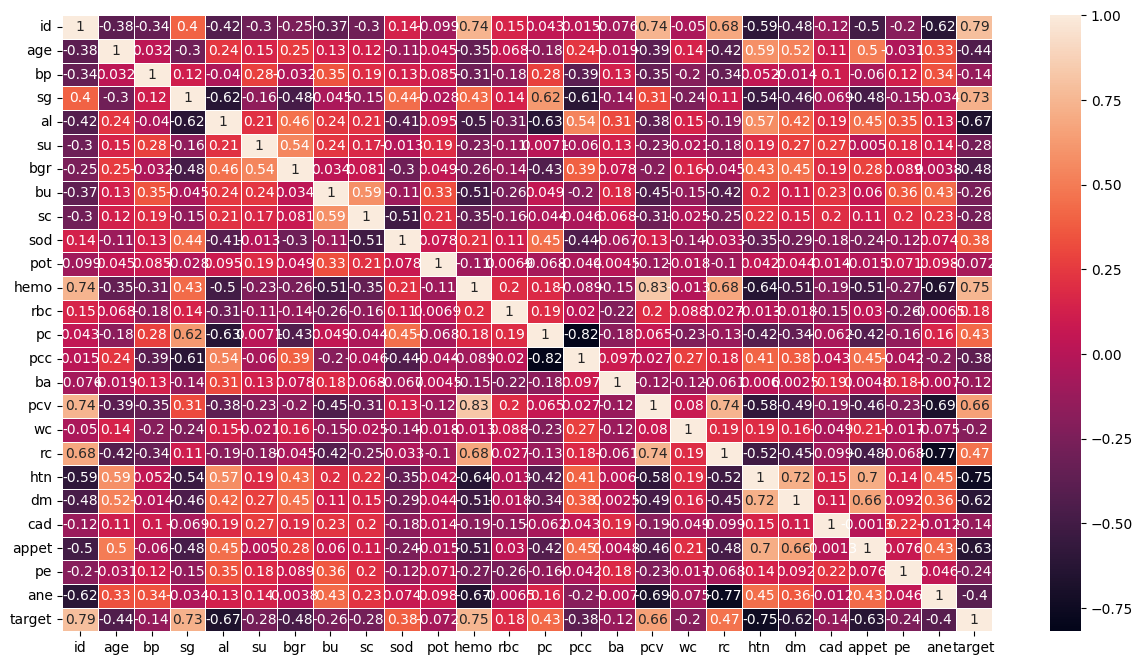

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(dataset.corr(),annot=True,linewidth= 0.5)
plt.show()

In [32]:
target_corr = dataset.corr()['target'].abs().sort_values(ascending=False)[1:]
target_corr

id       0.788592
hemo     0.749175
htn      0.748217
sg       0.726145
al       0.671141
pcv      0.658056
appet    0.627878
dm       0.617687
bgr      0.475306
rc       0.465326
age      0.438786
pc       0.428746
ane      0.402395
sod      0.384293
pcc      0.378944
sc       0.283408
su       0.276466
bu       0.263958
pe       0.238508
wc       0.202075
rbc      0.183619
cad      0.140981
bp       0.137397
ba       0.123432
pot      0.071989
Name: target, dtype: float64

In [33]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

# Create the ExtraTreesClassifier model
model = ExtraTreesClassifier()

# Fit the model on your data
model.fit(independent, dependent)

# Get feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Print feature importances
for i, index in enumerate(sorted_indices):
    print(f"{i + 1}. Feature: {independent.columns[index]} - Importance: {importances[index]}")

C:\Users\user\anaconda3\envs\aiml\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1. Feature: id - Importance: 0.18782310957132828
2. Feature: htn - Importance: 0.14794648807945826
3. Feature: sg - Importance: 0.11835620853130752
4. Feature: appet - Importance: 0.11560543406231875
5. Feature: al - Importance: 0.08915290313693221
6. Feature: hemo - Importance: 0.07897223506321609
7. Feature: pcv - Importance: 0.06138201317499641
8. Feature: dm - Importance: 0.049333444105586315
9. Feature: pc - Importance: 0.030212934827075287
10. Feature: ane - Importance: 0.021621634300142488
11. Feature: bgr - Importance: 0.015502722512951882
12. Feature: age - Importance: 0.011298822635345046
13. Feature: pe - Importance: 0.010218910081440047
14. Feature: rc - Importance: 0.009702293911083229
15. Feature: su - Importance: 0.009347099093746824
16. Feature: bp - Importance: 0.009067027748354026
17. Feature: sc - Importance: 0.0074272461951715605
18. Feature: pcc - Importance: 0.007311502442004224
19. Feature: sod - Importance: 0.006104900528708447
20. Feature: rbc - Importance: 0.0